In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sns.set(style='whitegrid', context='notebook')

In [40]:
df_ob = pd.read_csv('../datas/ObesityDataSet.csv', sep=',')
df_ob.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [41]:
columnas = ['Genero', 'Edad', 'Talla', 'Peso', 'Familia Obesa', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'Fuma', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Nivel Obesidad']
df_ob.columns = columnas
df_ob.head(2)

,Genero,Edad,Talla,Peso,Familia Obesa,FAVC,FCVC,NCP,CAEC,Fuma,CH2O,SCC,FAF,TUE,CALC,MTRANS,Nivel Obesidad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


In [77]:
df_ob['Nivel Obesidad'].value_counts()

Nivel Obesidad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [83]:
ob_tipo_i = round(df_ob[df_ob['Nivel Obesidad'].str.contains('Obesity_Type_I')]['Peso'], 2)
ob_tipo_ii = round(df_ob[df_ob['Nivel Obesidad'].str.contains('Obesity_Type_II')]['Peso'], 2)
ob_tipo_iii = round(df_ob[df_ob['Nivel Obesidad'].str.contains('Obesity_Type_III')]['Peso'], 2)
ow_tipo_i = round(df_ob[df_ob['Nivel Obesidad'].str.contains('Overweight_Level_I')]['Peso'], 2)
ow_tipo_ii = round(df_ob[df_ob['Nivel Obesidad'].str.contains('Overweight_Level_II')]['Peso'], 2)
normal = round(df_ob[df_ob['Nivel Obesidad'].str.contains('Normal_Weight')]['Peso'], 2)

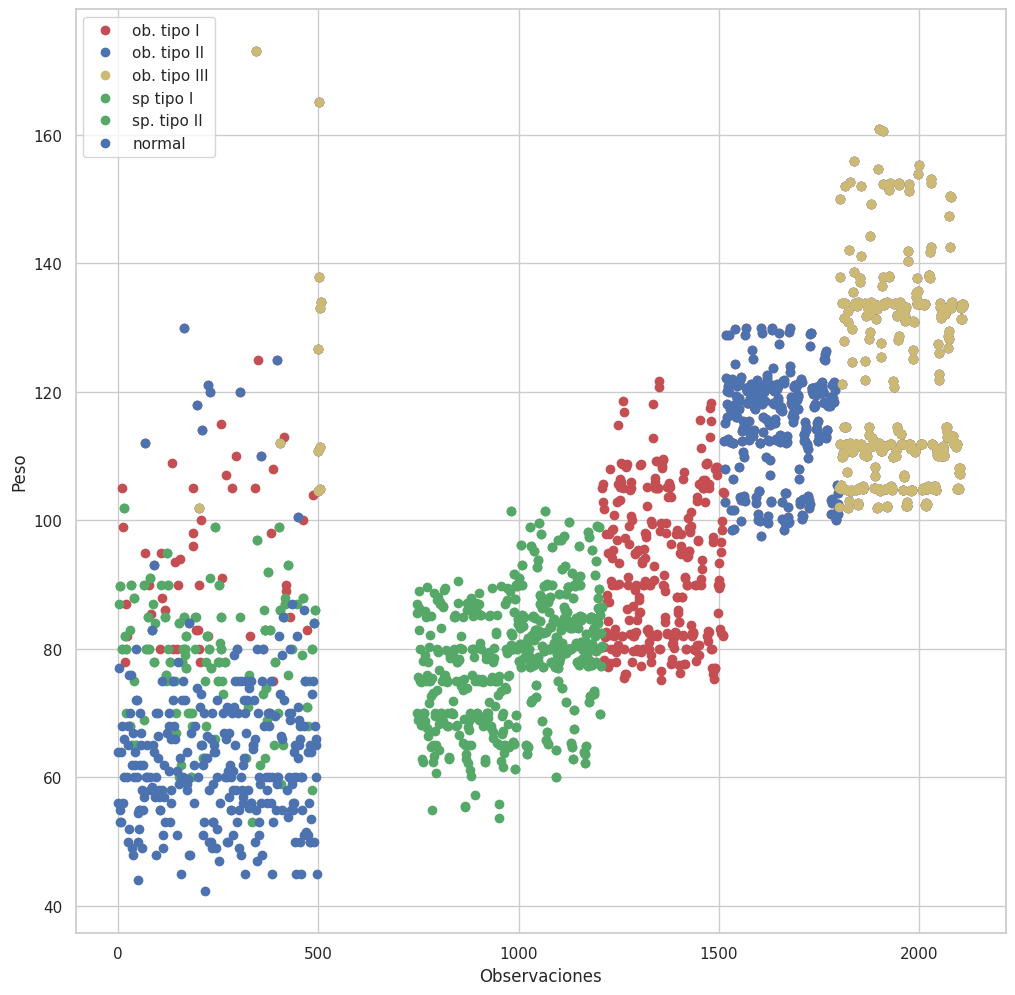

In [85]:
plt.figure(figsize=(12,12))
plt.plot(ob_tipo_i, 'ro', label='ob. tipo I')
plt.plot(ob_tipo_ii, 'bo', label='ob. tipo II')
plt.plot(ob_tipo_iii, 'yo', label='ob. tipo III')
plt.plot(ow_tipo_i, 'go', label='sp tipo I')
plt.plot(ow_tipo_ii, 'go', label='sp. tipo II')
plt.plot(normal, 'bo', label='normal')
plt.ylabel('Peso')
plt.xlabel('Observaciones')
plt.legend()
plt.show()

In [42]:
df_ob['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [43]:
df_ob_int = df_ob.select_dtypes(exclude='object')
df_ob_int.head(2)

,Edad,Talla,Peso,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0


In [44]:
#gráfico de codo y silueta
sum_of_squared_distances = []
silhouette_scores = []
k = range(2, 15)

for _ in k:
    km = KMeans(n_clusters=_)
    y = km.fit_predict(df_ob_int)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_ob_int, y))

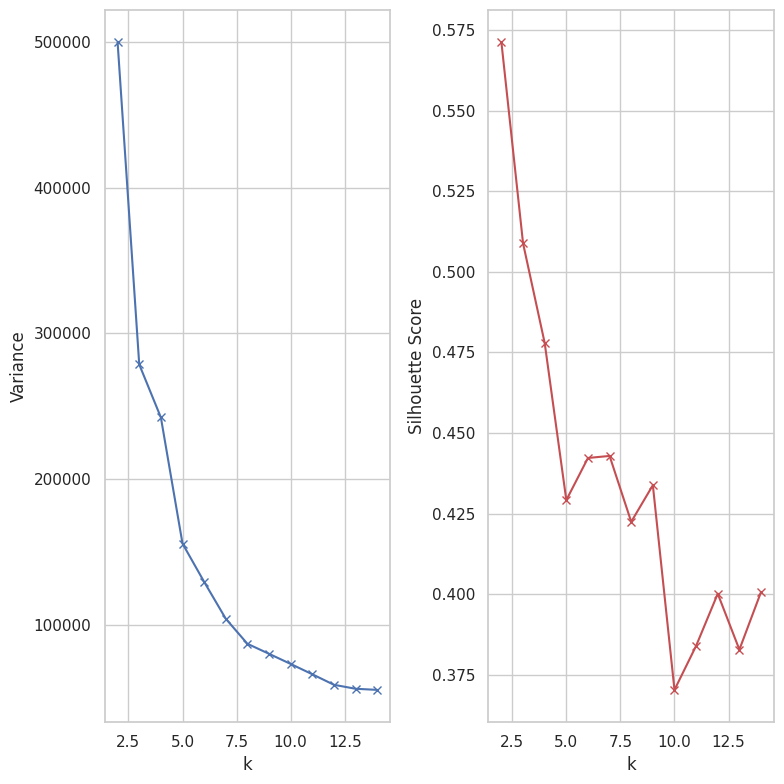

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].plot(k, sum_of_squared_distances, 'bx-')
axes[1].plot(k, silhouette_scores, 'rx-')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Variance')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [59]:
#Verificando el score
km = KMeans(n_clusters=3)
y = km.fit_predict(df_ob_int)
print(silhouette_score(df_ob_int, y))

0.5064581914150884
